# Applied

__8.__ This question involves the use of simple linear regression on the `Auto` data set.

In [1]:
Auto <- read.table("../../99DataSets/Auto.data", header=T, na.strings="?", stringsAsFactors=T)
Auto <- na.omit(Auto)

(a) Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output.  
For example:

In [2]:
mpg.fit <- lm(mpg ~ horsepower, data = Auto)
summary(mpg.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


i. Is there a relationship between the predictor and the response?
ii. How strong is the relationship between the predictor and the response?
iii. Is the relationship between the predictor and the response positive or negative?

There is a significant relationship between `horsepower` and `mpg`. For every $0.16$ increase in `horsepower`, `mpg` decreases one unit. Therefore the relationship is negative.

iv. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95% confidence and prediction intervals?

In [3]:
predict(mpg.fit, data.frame(horsepower = 98), interval = "confidence")

,fit,lwr,upr
1,24.46708,23.97308,24.96108


In [4]:
predict(mpg.fit, data.frame(horsepower = 98), interval = "prediction")

,fit,lwr,upr
1,24.46708,14.8094,34.12476


The predicted `mpg` is $24.5$ and the confidence interval is $[24.0, 25.0]$ and the prediction interval is $[14.8, 34.1]$.

(b) Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

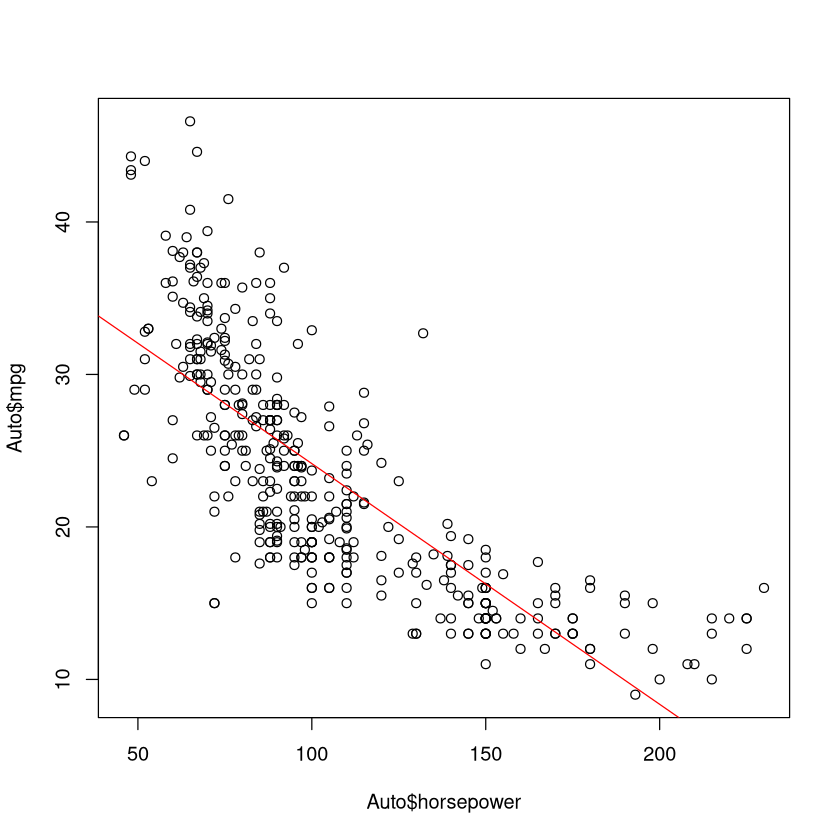

In [5]:
plot(Auto$horsepower, Auto$mpg)
abline(mpg.fit, col="red")

(c) Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

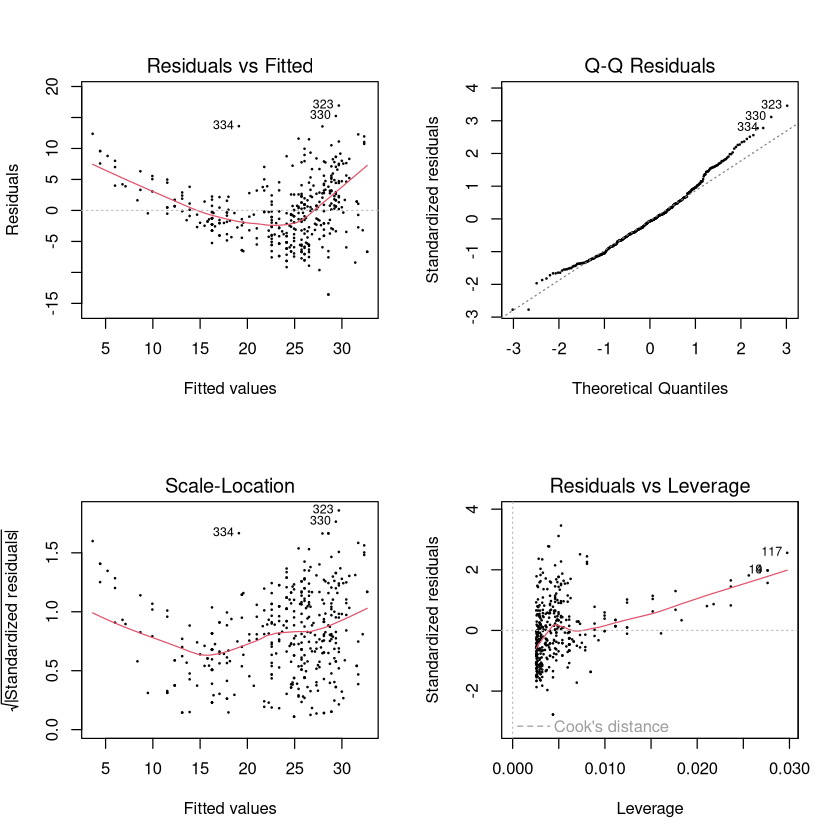

In [6]:
par(mfrow=c(2,2))
plot(mpg.fit, cex=0.2)

The residuals show a trend that suggests a non-linear relationship.

---

__9.__ This question involves the use of mulitple linear regression on the `Auto` data set.

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

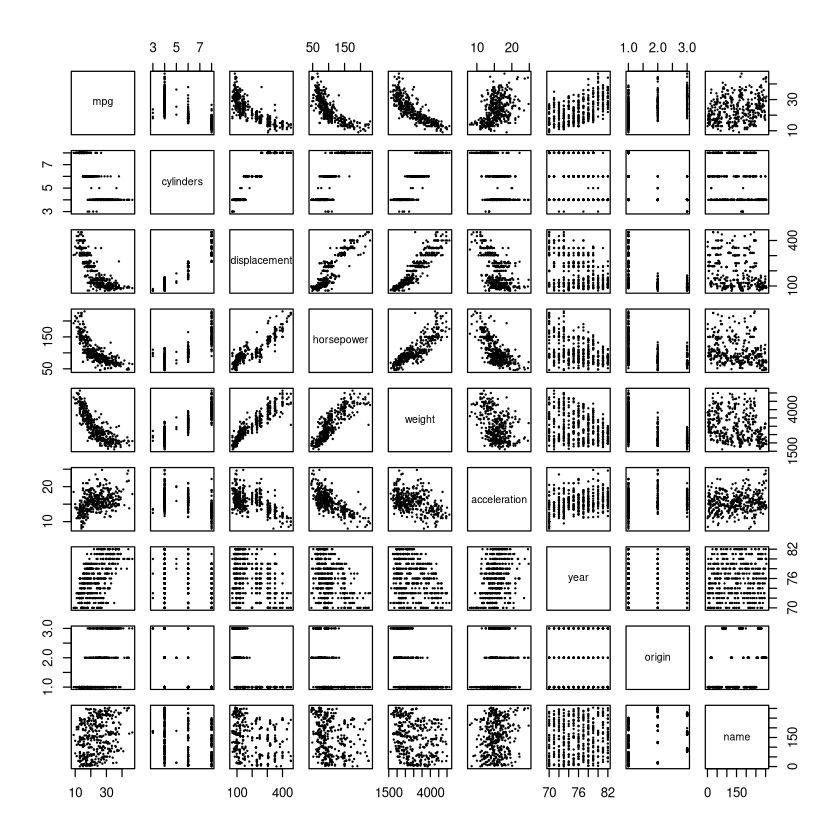

In [7]:
pairs(Auto, cex=0.2)

(b) Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the `name` varialbe, which is qualitative.

In [8]:
x <- subset(Auto, select = - name)
cor(x)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


(c) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summary()` function to print the results. Comment on the output.

In [9]:
fit <- lm(mpg ~ ., data=x)
summary(fit)


Call:
lm(formula = mpg ~ ., data = x)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


(i) Is there a relationship between the predictors and the response?  
(ii) Which predictors appear to have a statisitcally significant relationship to the response?  
(iii) What does the coefficient for the `year` variable suggest?

There is a definite relationship between `mpg` and: `displacement` (positive), `weight` (negative), `year` (positive), and `origin` (positive). The coefficent for `year` (0.75) suggests that every year, the `mpg` increases by this amount.

(d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

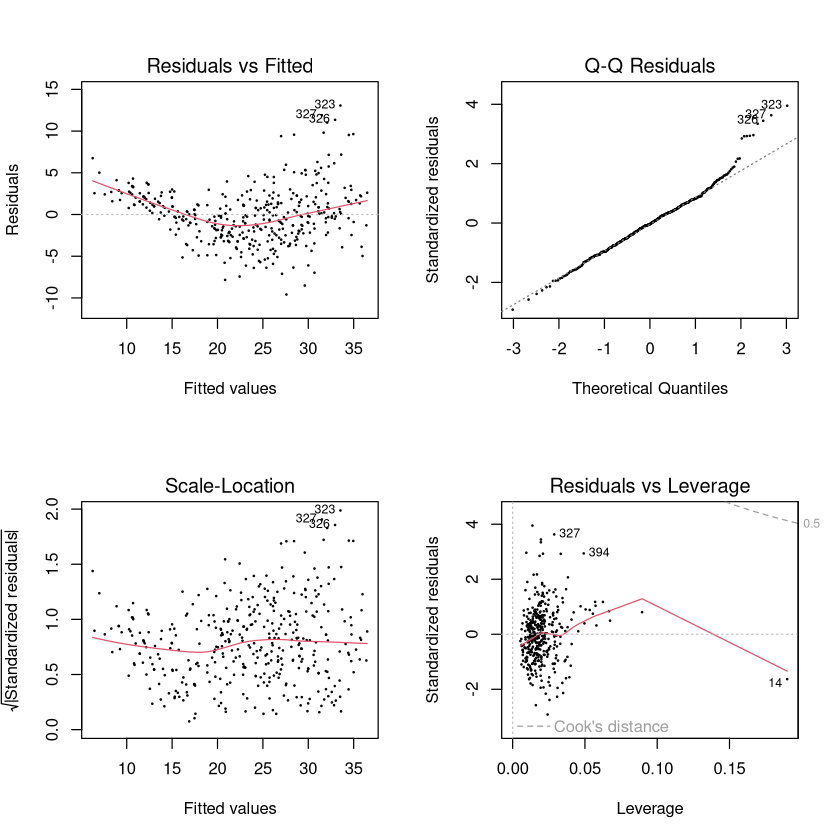

In [10]:
par(mfrow=c(2,2))
plot(fit, cex=0.2)

(e) Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [11]:
summary(lm(mpg ~ . + weight:horsepower, data=x))


Call:
lm(formula = mpg ~ . + weight:horsepower, data = x)

Residuals:
   Min     1Q Median     3Q    Max 
-8.589 -1.617 -0.184  1.541 12.001 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.876e+00  4.511e+00   0.638 0.524147    
cylinders         -2.955e-02  2.881e-01  -0.103 0.918363    
displacement       5.950e-03  6.750e-03   0.881 0.378610    
horsepower        -2.313e-01  2.363e-02  -9.791  < 2e-16 ***
weight            -1.121e-02  7.285e-04 -15.393  < 2e-16 ***
acceleration      -9.019e-02  8.855e-02  -1.019 0.309081    
year               7.695e-01  4.494e-02  17.124  < 2e-16 ***
origin             8.344e-01  2.513e-01   3.320 0.000986 ***
horsepower:weight  5.529e-05  5.227e-06  10.577  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.931 on 383 degrees of freedom
Multiple R-squared:  0.8618,	Adjusted R-squared:  0.859 
F-statistic: 298.6 on 8 and 383 DF,  p-value: < 2.

In [12]:
summary(lm(mpg ~ . + acceleration:horsepower, data=x))


Call:
lm(formula = mpg ~ . + acceleration:horsepower, data = x)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0329 -1.8177 -0.1183  1.7247 12.4870 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -32.499820   4.923380  -6.601 1.36e-10 ***
cylinders                 0.083489   0.316913   0.263 0.792350    
displacement             -0.007649   0.008161  -0.937 0.349244    
horsepower                0.127188   0.024746   5.140 4.40e-07 ***
weight                   -0.003976   0.000716  -5.552 5.27e-08 ***
acceleration              0.983282   0.161513   6.088 2.78e-09 ***
year                      0.755919   0.048179  15.690  < 2e-16 ***
origin                    1.035733   0.268962   3.851 0.000138 ***
horsepower:acceleration  -0.012139   0.001772  -6.851 2.93e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.145 on 383 degrees of freedom
Multiple R-squared:  0.841,	Adj

In [13]:
summary(lm(mpg ~ . + cylinders:weight, data=x))


Call:
lm(formula = mpg ~ . + cylinders:weight, data = x)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9484  -1.7133  -0.1809   1.4530  12.4137 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       7.3143478  5.0076737   1.461  0.14494    
cylinders        -5.0347425  0.5795767  -8.687  < 2e-16 ***
displacement      0.0156444  0.0068409   2.287  0.02275 *  
horsepower       -0.0314213  0.0126216  -2.489  0.01322 *  
weight           -0.0150329  0.0011125 -13.513  < 2e-16 ***
acceleration      0.1006438  0.0897944   1.121  0.26306    
year              0.7813453  0.0464139  16.834  < 2e-16 ***
origin            0.8030154  0.2617333   3.068  0.00231 ** 
cylinders:weight  0.0015058  0.0001657   9.088  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.022 on 383 degrees of freedom
Multiple R-squared:  0.8531,	Adjusted R-squared:  0.8501 
F-statistic: 278.1 on 8 and 383 DF,  p-v

(f) Try a few different transformations of the variables, such as $\log{(X)}, \sqrt{X}, X^2$. Comment on your findings

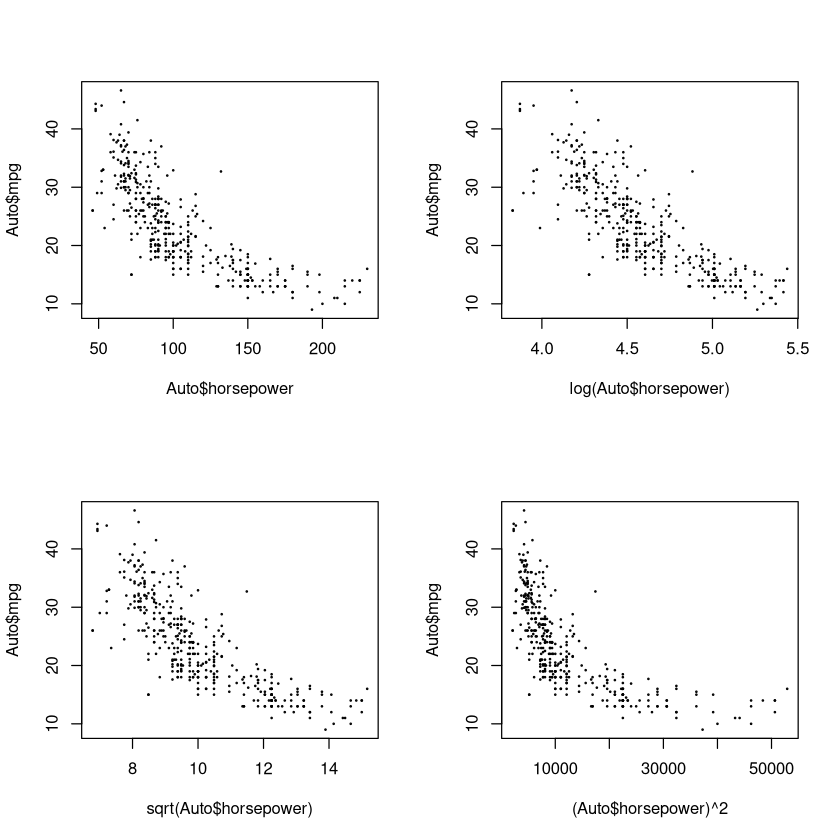

In [14]:
par(mfrow = c(2,2))
plot(Auto$horsepower, Auto$mpg, cex=0.2)
plot(log(Auto$horsepower), Auto$mpg, cex=0.2)
plot(sqrt(Auto$horsepower), Auto$mpg, cex=0.2)
plot((Auto$horsepower)^2, Auto$mpg, cex=0.2)

---

__10.__ This question should be answered using the `Carseats` data set.

In [15]:
require(ISLR2)
head(Carseats)

Loading required package: ISLR2


Attaching package: ‘ISLR2’


The following object is masked _by_ ‘.GlobalEnv’:

    Auto




,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


(a) Fit a multiple regression model to predict `Sales` using `Price`, and `Urban`, and `US`.  
(b) Provide an interpretation of each coefficient in the model. Be careful&mdash;some of the variables in the model are qualitative!

In [16]:
fit1 <- lm(Sales ~ Price + Price + Urban + US, data = Carseats)
summary(fit1)


Call:
lm(formula = Sales ~ Price + Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


(c) Write out the model in equation form, being careful to handle the qualitative variables properly.  
\begin{align}
\text{Sales} = 13 + (-0.054)\text{Price} + (-0.02)
    \begin{cases}
      1 \text{ if Urban } == \text{Yes} \\
      0 \text{ if Urban } == \text{No}
    \end{cases}
+ (1.2)
    \begin{cases}
      1 \text{ if US } == \text{Yes} \\
      0 \text{ if US } == \text{No}
    \end{cases}
\end{align}

(d) For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?  

The null hypothesis can be rejected for `Price` and `US`. `Urban` shows no significance between No and Yes.

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [17]:
fit2 <- lm(Sales ~ Price + US, data = Carseats)
summary(fit2)
anova(fit1, fit2)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,396,2420.835,NA,NA,NA,NA
2,397,2420.874,-1,-0.03979039,0.00650891,0.9357389


There is no significant difference between the two models. Which is to be expected.

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [18]:
confint(fit2)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


(h) Is there evidence of outliers or high leverage observations in the model from (e)?

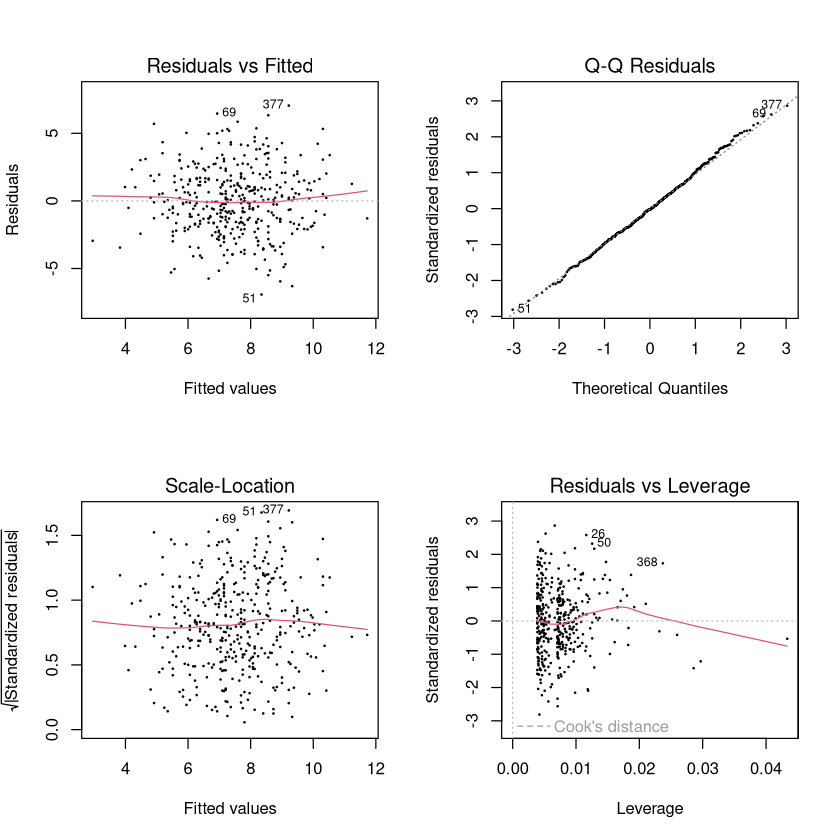

In [19]:
par(mfrow = c(2,2))
plot(fit2, cex=0.2)

Yes, somewhat

---

__11.__ In this problem we will investigate the _t_-statistic for the null hypothesis $H_0 : \beta = 0$ in simple linear regression without an intercept. To begin, we generate a predictor `x` and a response `y` as follows:

In [20]:
set.seed(1)
x <- rnorm(100)
y <- 2 * x + rnorm(100)

(a) Perform a simple linear regression of `y` onto `x`, _without_ an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the _t_-statistic and _p_-value associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results. (You can perform regression without an intercept using the command `lm(y~x+0)`.)

In [21]:
fit <- lm(y ~ x + 0)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
x,1.993876,0.1064767,18.72593,2.642197e-34


There is a significant positive relationship between `x` and `y`. `y` values are predicted to be almost twice `x` values.

(b) Now perform a simple linear regression of `x` onto `y` without an intercept, and report the coefficient estimate, its standard error, and the corresponding _t_-statistic and _p_-values associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.

In [22]:
fit2 <- lm(x ~ y + 0)
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
y,0.3911145,0.02088625,18.72593,2.642197e-34


Again, there is significant positive relationship between `y` and `x`. This time the `y` values are almost 40% of the `x` value.

(c) What is the relationship between the results obtained in (a) and (b)?  

__SOLUTION__  
They should be the inverse of each other, however there is some error.

(d) For the regression of $Y$ onto $X$ without an intercept, the _t_-statistic for $H_0 : \beta = 0$ takes the form $\hat{\beta}/\text{SE}(\hat{\beta})$, where $\hat{\beta}$ is given by (3.38), and where

\begin{align}
\text{SE}(\hat{\beta}) = \sqrt{ \frac{ \sum^n_{i=1}{(y_i - x_i \hat{\beta})^2} } { (n - 1) \sum^n_{i'=1}{x_{i'}^2 } } }
\end{align}

(These formulas are slightly different from those given in sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in `R`, that the _t_-statistic can be written as

\begin{align}
\frac{ (\sqrt{n - 1})\sum^n_{i=1}{x_i y_i} } { \sqrt{ (\sum^n_{i=1}{x^2_i}) (\sum^n_{i'=1}{ y_{i'}^2 }) - (\sum^n_{i'=1}{x_{i'} y_{i'})^2} } }\text{.}
\end{align}
__SOLUTION__  
https://danhalligan.github.io/ISLRv2-solutions/linear-regression.html#applied-1

(e) Using the results from (d), argue that the _t_-statistic for the regression of `y` onto `x` is the same as the _t_-statistic for the regression of `x` onto `y`.

(f) In `R`, show that when regression is performed _with_ an intercept, the _t_-statistic for $H_0 : \beta_1 = 0$ is the same for the regression of `y` onto `x` as it is for the regression of `x` onto `y`.

In [23]:
fit1 <- lm(y ~ x)
fit2 <- lm(x ~ y)
coef(summary(fit1))
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.03769261,0.09698729,-0.3886346,6.983896e-01
x,1.99893961,0.10772703,18.5555993,7.723851e-34


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.03880394,0.04266144,0.9095787,3.652764e-01
y,0.38942451,0.02098690,18.5555993,7.723851e-34


---

__12.__ This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of $Y$ onto $X$ without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of $X$ onto $Y$ the same as the coefficient estimate for the regression of $Y$ onto $X$?

\begin{align}
\hat{\beta} = \left( \sum^n_{i=1}{x_i y_i} \right) / \left( \sum^n_{i'=1}{x_{i'}^2} \right)
\end{align}
The coefficient for the regression of $X$ onto $Y$ swaps the $x$ and $y$ variables
\begin{align}
\hat{\beta} = \left( \sum^n_{i=1}{x_i y_i} \right) / \left( \sum^n_{i'=1}{y_{i'}^2} \right)
\end{align}

(b) Generate an example in `R` with $n=100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is _different_ from the coefficient estimate for the regression of $Y$ onto $X$.

In [24]:
x <- rnorm(100)
y <- 2 * x + rnorm(100, 0, .1)
coef(summary(lm(x ~ y + 0)))
coef(summary(lm(y ~ x + 0)))
c(sum(x^2), sum(y^2))

,Estimate,Std. Error,t value,Pr(>|t|)
y,0.4962088,0.00236533,209.7842,6.076259e-133


,Estimate,Std. Error,t value,Pr(>|t|)
x,2.010757,0.009584885,209.7842,6.076259e-133


[1] 105.9889 429.4924

(c) Generate an example in `R`  with $n=100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is the same as the coefficient estimate for the regression of $Y$ onto $X$.

In [25]:
x <- rnorm(100)
y <- x + rnorm(100, 0, .1)
coef(summary(lm(x ~ y + 0)))
coef(summary(lm(y ~ x + 0)))
c(sum(x^2), sum(y^2))

,Estimate,Std. Error,t value,Pr(>|t|)
y,1.000531,0.008339281,119.9781,5.128363e-109


,Estimate,Std. Error,t value,Pr(>|t|)
x,0.9926421,0.008273526,119.9781,5.128363e-109


[1] 135.5844 134.5153

---

__13.__ In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use `set.seed(1)` prior to starting part (a) to ensure consistent results.

(a) Using the `rnorm()` function, create a vector, `x`, containing 100 observations drawn from a $N(0,1)$ distribution, This represents a feature, $X$.

In [26]:
set.seed(1)

In [27]:
x <- rnorm(100, 0, 1)

(b) Using the `rnorm()` function, create a vector, `eps`, containing 100 observations drawn from a $N(0, 0.25)$ distribution&mdash;a normal distribution with mean zero and variance $0.25$.

In [28]:
eps <- rnorm(100, 0, sqrt(0.25))

(c) Using `x` and `eps`, generate a vector `y` according to the model
\begin{align}\tag{3.39}
Y = -1 + 0.5X + \epsilon\text{.}
\end{align}
What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

In [29]:
y <- -1 + 0.5 * x + eps
length(y)

[1] 100

$\beta_0=-1$ and $\beta_1=.5$.

(d) Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

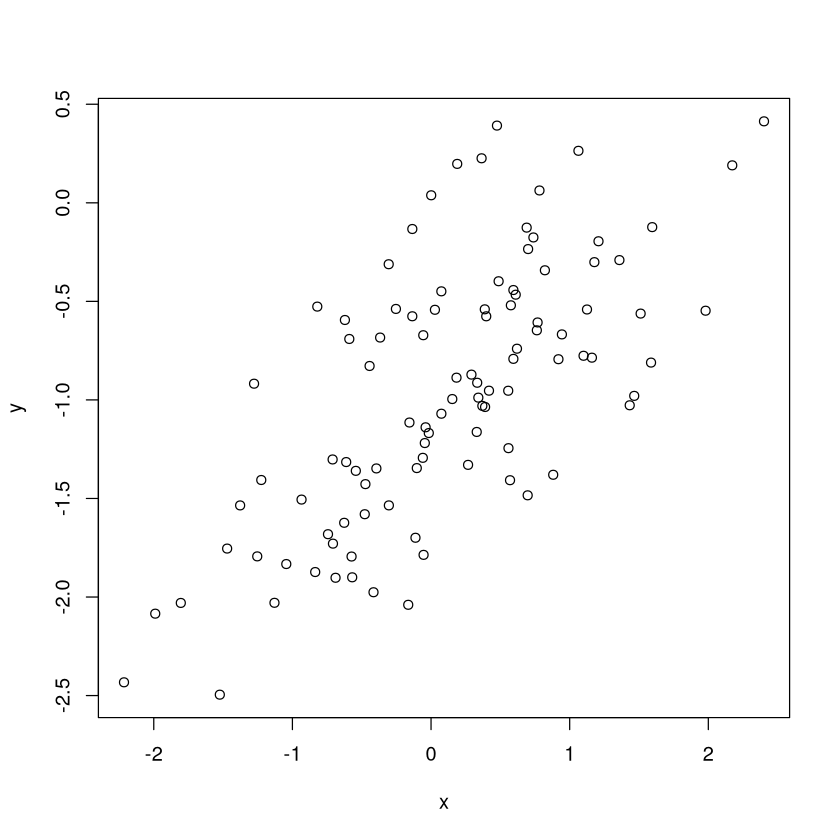

In [30]:
plot(x,y)

This is basically a linear relationship with some noise.

(e) Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{\beta_0}$ and $\hat{\beta_1}$ compare to $\beta_0$ and $\beta_1$?

In [31]:
fit1 <- lm(y ~ x)
summary(fit1)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93842 -0.30688 -0.06975  0.26970  1.17309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.01885    0.04849 -21.010  < 2e-16 ***
x            0.49947    0.05386   9.273 4.58e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4814 on 98 degrees of freedom
Multiple R-squared:  0.4674,	Adjusted R-squared:  0.4619 
F-statistic: 85.99 on 1 and 98 DF,  p-value: 4.583e-15


$\hat{\beta_0}$ and $\hat{\beta_1}$ are pretty close to $\beta_0$ and $\beta_1$.

(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` command to  create an appropriate legend.

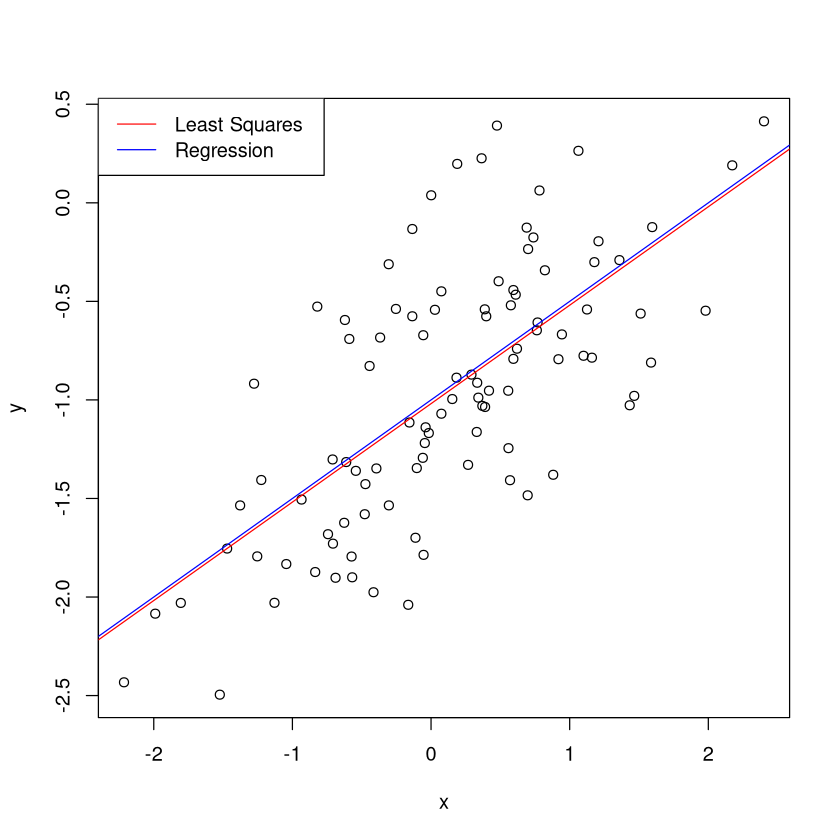

In [32]:
plot(x,y)
abline(fit1, col="red")
abline(-1, .5, col="blue")
legend("topleft", c("Least Squares", "Regression"), col=c("red", "blue"), lty = c(1,1))

(g) Now fit a polynomial regression model that predicts `y` and `x` and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [33]:
fit2 <- lm(y ~ x + I(x^2))
summary(fit2)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98252 -0.31270 -0.06441  0.29014  1.13500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.97164    0.05883 -16.517  < 2e-16 ***
x            0.50858    0.05399   9.420  2.4e-15 ***
I(x^2)      -0.05946    0.04238  -1.403    0.164    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.479 on 97 degrees of freedom
Multiple R-squared:  0.4779,	Adjusted R-squared:  0.4672 
F-statistic:  44.4 on 2 and 97 DF,  p-value: 2.038e-14


The _p_-value of $x^2$ is higher than $0.05$ which indicates that the variable is not significant. There is no evidence that the quadratic term improves the model.

(h) Repeat (a)&ndash;(f) after modifying the data generation process in such a way that there is _less_ noise in the data. The model (3.39) should remain the same. You can do this by decresing the variance of the normal distribuion used to genrate the error term $\epsilon$ in (b). Describe your results.

In [34]:
set.seed(1)
x <-rnorm(100)
eps <- rnorm(100, 0, 0.05)
y <- -1 + 0.5 * x + eps
fit3 <- lm(y ~ x)
summary(fit3)


Call:
lm(formula = y ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.093842 -0.030688 -0.006975  0.026970  0.117309 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.001885   0.004849 -206.60   <2e-16 ***
x            0.499947   0.005386   92.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04814 on 98 degrees of freedom
Multiple R-squared:  0.9888,	Adjusted R-squared:  0.9886 
F-statistic:  8615 on 1 and 98 DF,  p-value: < 2.2e-16


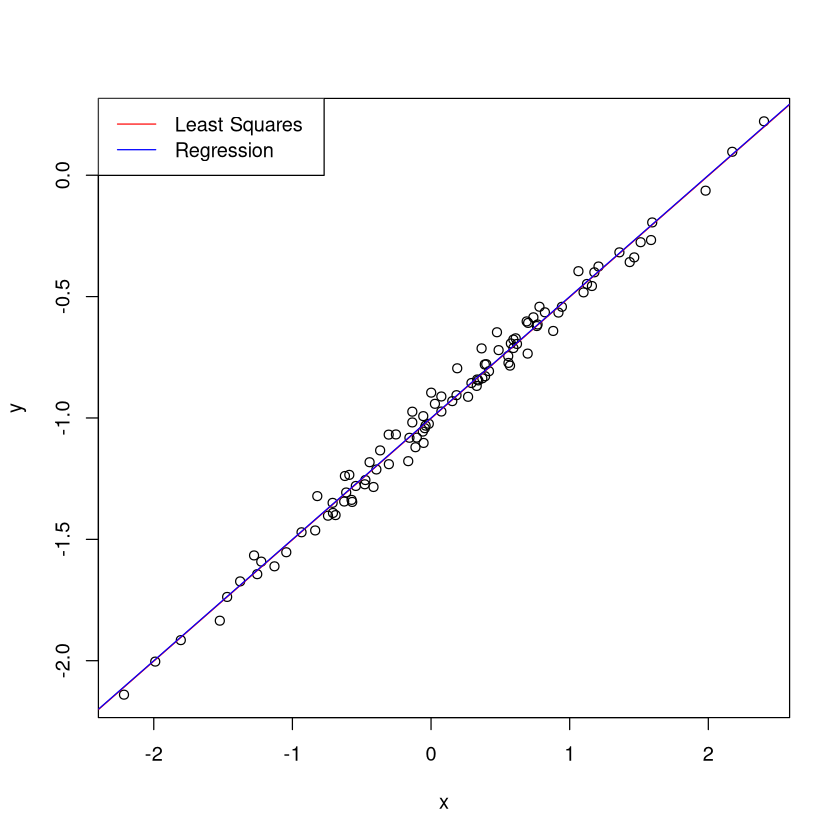

In [35]:
plot(x,y)
abline(fit3, col="red")
abline(-1, .5, col="blue")
legend("topleft", c("Least Squares", "Regression"), col=c("red", "blue"), lty = c(1,1))

With less noise, the data shows less variability and a higher $R^2$ score.

(i) Repeat (a)&ndash;(f) after modifying the data generation process in such a way that there is _less_ noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribuion used to genrate the error term $\epsilon$ in (b). Describe your results.

In [36]:
set.seed(1)
x <-rnorm(100)
eps <- rnorm(100, 0, 0.75)
y <- -1 + 0.5 * x + eps
fit4 <- lm(y ~ x)
summary(fit4)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4076 -0.4603 -0.1046  0.4046  1.7596 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.02827    0.07274 -14.136  < 2e-16 ***
x            0.49920    0.08080   6.179 1.48e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7221 on 98 degrees of freedom
Multiple R-squared:  0.2803,	Adjusted R-squared:  0.273 
F-statistic: 38.18 on 1 and 98 DF,  p-value: 1.479e-08


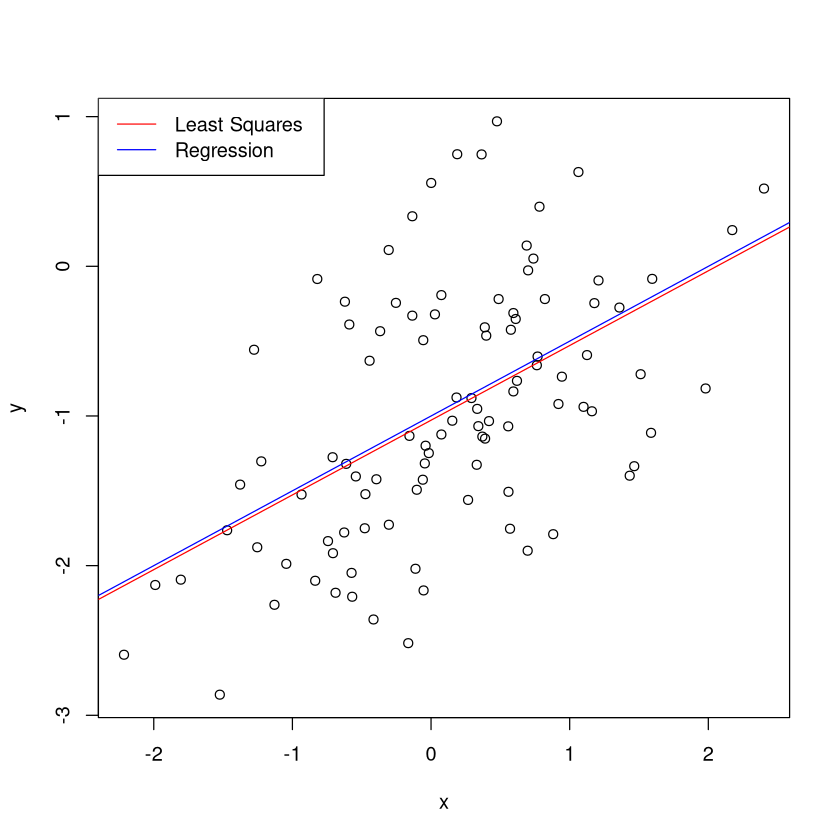

In [37]:
plot(x,y)
abline(fit4, col="red")
abline(-1, .5, col="blue")
legend("topleft", c("Least Squares", "Regression"), col=c("red", "blue"), lty = c(1,1))

The noise makes the data highly variable, and thus the $R^2$ is bad.

(j) What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noiser data set, and the less noisy data set? Comment on your results.

In [38]:
confint(fit1) # middle
confint(fit3) # less noise
confint(fit4) # more noise

,2.5 %,97.5 %
(Intercept),-1.1150804,-0.9226122
x,0.3925794,0.6063602


,2.5 %,97.5 %
(Intercept),-1.0115080,-0.9922612
x,0.4892579,0.5106360


,2.5 %,97.5 %
(Intercept),-1.1726206,-0.8839184
x,0.3388691,0.6595403


The confidence intervals are narrower with less noise.

---

__14.__ This problem focuses on the _collinearity_ problem.

(a) Perform the following commands in `R`:

In [39]:
set.seed(1)
x1 <- runif(100)
x2 <- 0.5 * x1 + rnorm(100) / 10
y <- 2 + 2 * x1 + 0.3 * x2 + rnorm(100)

The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2`. Write out the form of the linear model. What are the regression coefficients?  

__SOLUTION__  
\begin{align}
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
\end{align}
where $\beta_0 = 2$, $\beta_1 = 2$, and $\beta_2 = 0.3$.

(b) What is the correlation between`x1` and `x2`? Create a scatterplot displaying the relationship between the variables.

[1] 0.8351212

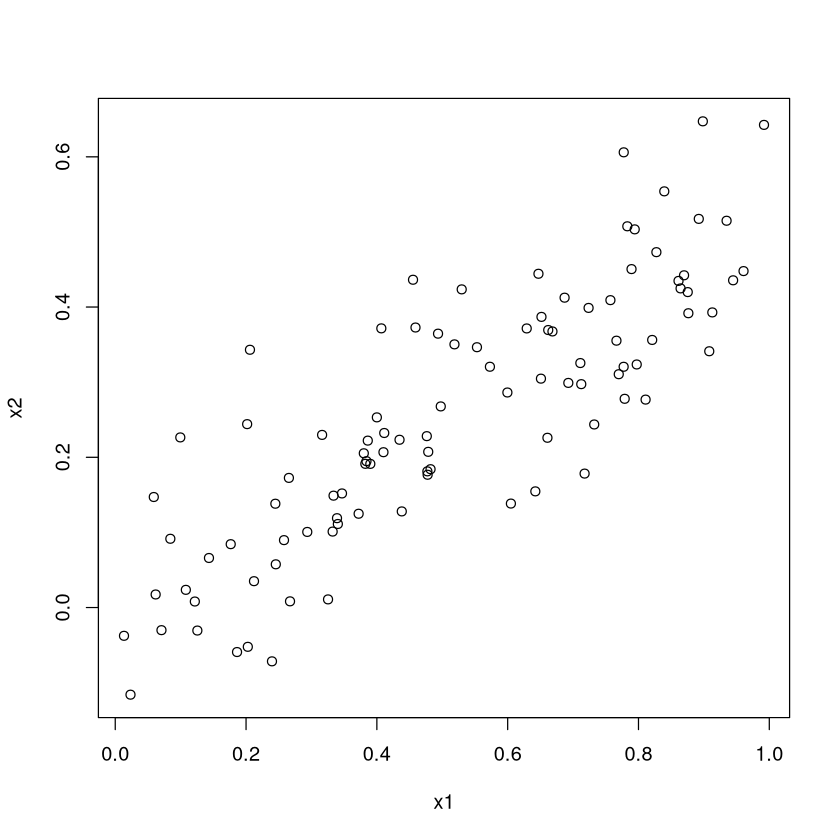

In [40]:
cor(x1, x2)
plot(x1, x2)

(c) Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $\hat{\beta_0}$, $\hat{\beta_1}$, and $\hat{\beta_2}$? How do these relate to the true $\beta_0$, $\beta_1$, $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_2 = 0$?

In [41]:
fit <- lm(y ~ x1 + x2)
summary(fit)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


$\hat{\beta_0}=2.13$, $\hat{\beta_1}=1.44$, and $\hat{\beta_2}=1.01$ judging by the standard error these are poor estimates. We can just about reject the null hypothesis for $\beta_1=0$. However, we cannot reject the null hypothesis for $\beta_2=0$. The _p_-value is significant.

(d) Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [42]:
fit2 <- lm(y ~ x1)
summary(fit2)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


The _p_-value for $\beta_1$ has decreased drastically. With the smaller _p_-value, we can reject the null hypothesis $H_0 : \beta_1 = 0$.

(e) Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_2 = 0$

In [43]:
fit3 <- lm(y ~ x2)
summary(fit3)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


Using only `x2` we now get a similarly drastically reduced _p_-value for $\beta_2$. This means for we can reject the null hypothesis $H_0 : \beta_2 = 0$.

(f) Do the results obtained in (c)&ndash;(e) contradict each other? Explain your answer.  

__SOLUTION__  
Since the two variables $x1$ and $x2$ are correlated, they don't offer much information together. However, they can explain the variablity in `y` when taken individually.

(g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.

In [44]:
x1 <- c(x1, 0.1)
x2 <- c(x2, 0.8)
y <- c(y, 6)

Re-fit the linear models for (c) to (e) using this new data. What effect does this new observation have on each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answer.


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 7.91e-16 ***
x1            0.5394     0.5922   0.911  0.36458    
x2            2.5146     0.8977   2.801  0.00614 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 5.564e-06


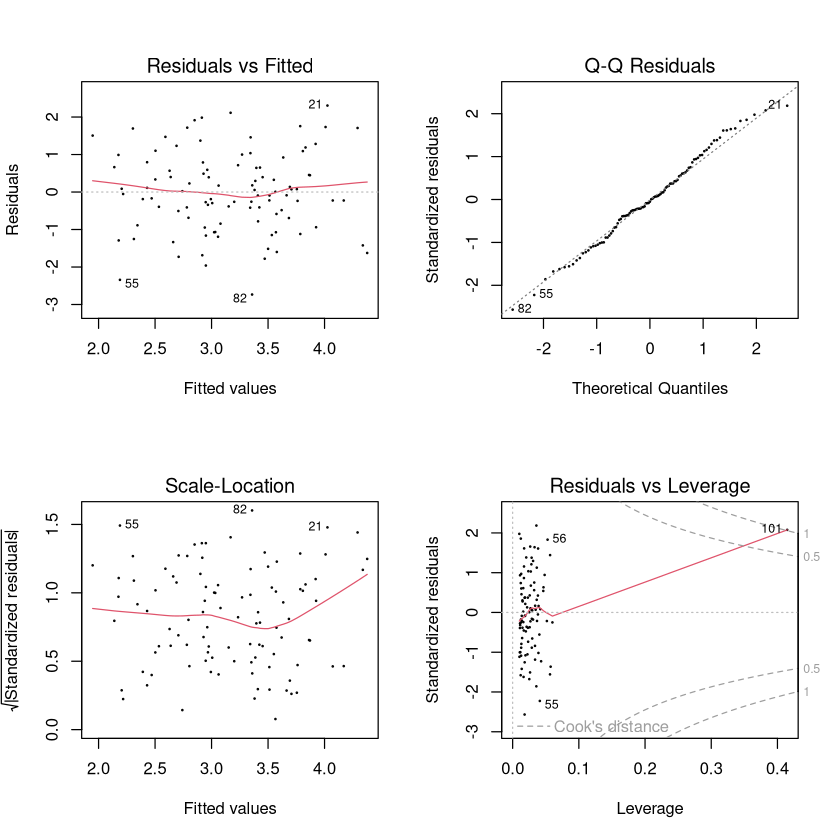

In [45]:
summary(lm(y ~ x1 + x2))
par(mfrow = c(2, 2))
plot(lm(y ~ x1 + x2), cex = 0.2)

In the first model (with both predictors), the point has very high leverage (since it is an outlier in terms of the joint `x1` and `x2` distribution), however it is not an outlier.


Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 1.78e-15 ***
x1            1.7657     0.4124   4.282 4.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 4.295e-05


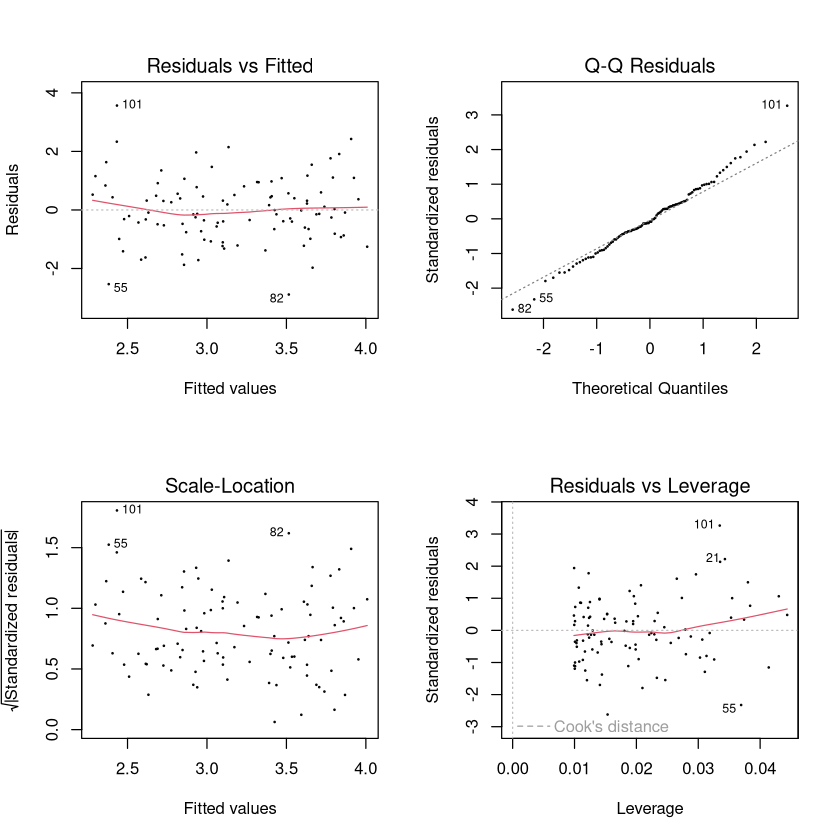

In [46]:
summary(lm(y ~ x1))
par(mfrow = c(2, 2))
plot(lm(y ~ x1), cex = 0.2)

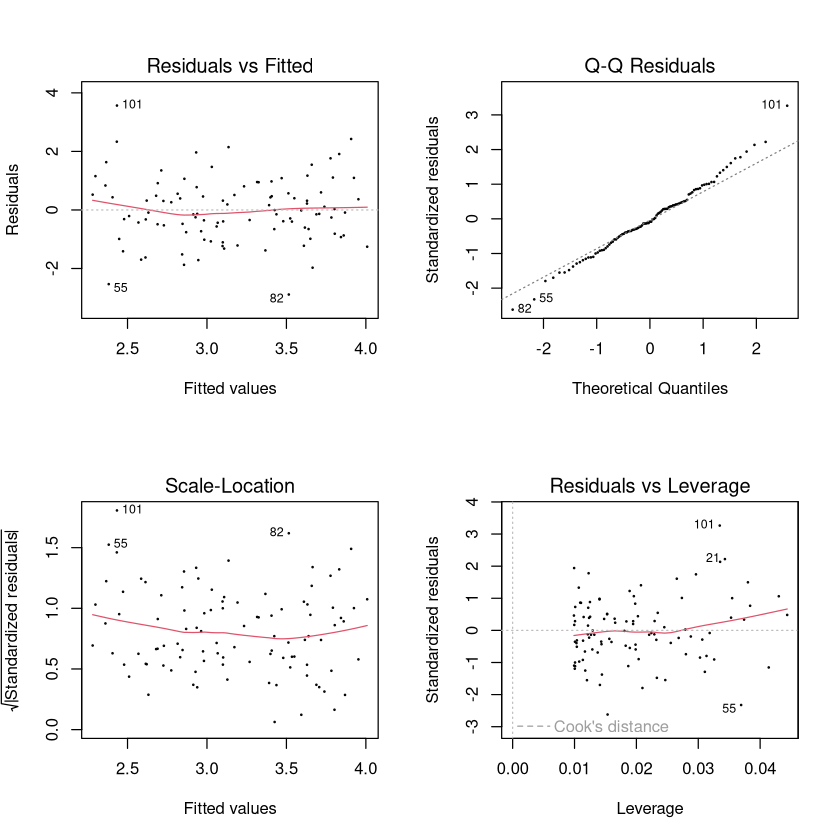

In [47]:
par(mfrow = c(2, 2))
plot(lm(y ~ x1), cex = 0.2)

In the model that only include `x1`, it is an outlier but does not have high leverage.


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264  < 2e-16 ***
x2            3.1190     0.6040   5.164 1.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 1.253e-06


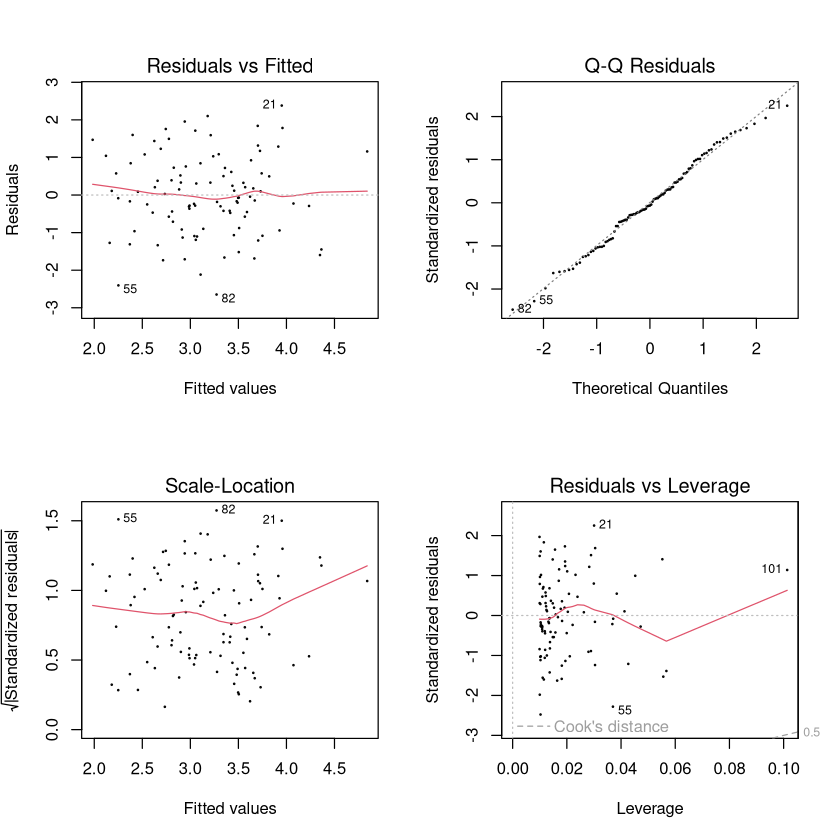

In [48]:
summary(lm(y ~ x2))
par(mfrow = c(2, 2))
plot(lm(y ~ x2), cex = 0.2)

In the model that only includes `x2`, it has high leverage but it is not an outlier.  

It is useful to consider the scatterplot.

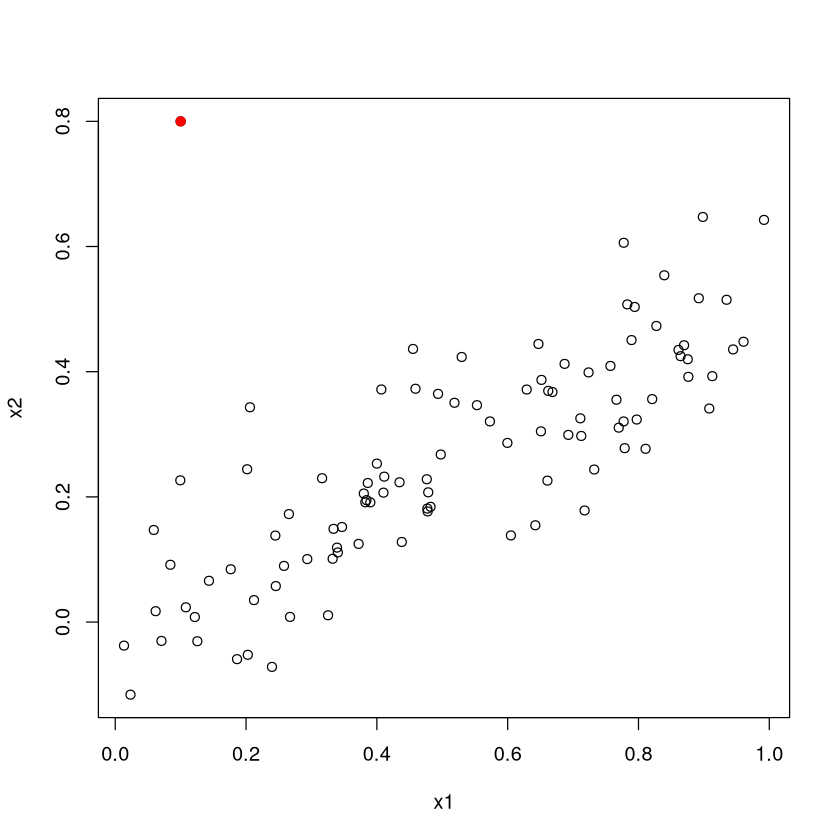

In [49]:
plot(x1, x2)
points(0.1, 0.8, col = "red", pch = 19)

---

__15.__ This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [50]:
pred <- subset(Boston, select = -crim)

(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [51]:
fits <- lapply(pred, function(x) lm(Boston$crim ~ x))
printCoefmat(do.call(rbind, lapply(fits, function(x) coef(summary(x))[2, ])))

          Estimate Std. Error t value  Pr(>|t|)    
zn      -0.0739350  0.0160946 -4.5938 5.506e-06 ***
indus    0.5097763  0.0510243  9.9908 < 2.2e-16 ***
chas    -1.8927766  1.5061155 -1.2567    0.2094    
nox     31.2485312  2.9991904 10.4190 < 2.2e-16 ***
rm      -2.6840512  0.5320411 -5.0448 6.347e-07 ***
age      0.1077862  0.0127364  8.4628 2.855e-16 ***
dis     -1.5509017  0.1683300 -9.2135 < 2.2e-16 ***
rad      0.6179109  0.0343318 17.9982 < 2.2e-16 ***
tax      0.0297423  0.0018474 16.0994 < 2.2e-16 ***
ptratio  1.1519828  0.1693736  6.8014 2.943e-11 ***
lstat    0.5488048  0.0477610 11.4907 < 2.2e-16 ***
medv    -0.3631599  0.0383902 -9.4597 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


The predictor `chas` is not significant.

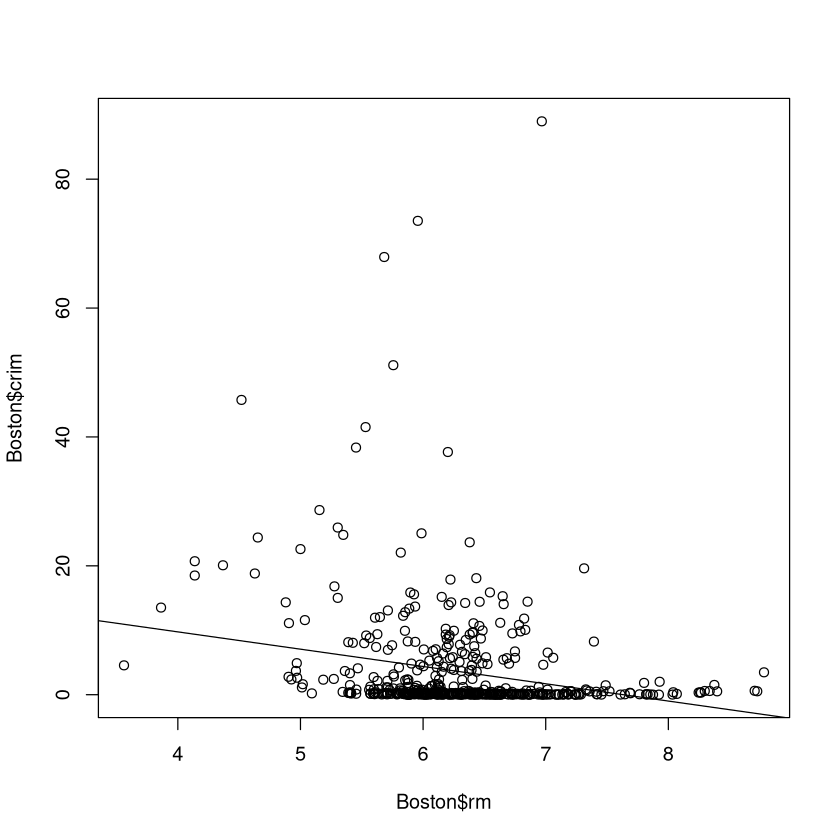

In [52]:
plot(Boston$rm, Boston$crim)
abline(fits[[5]])

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your rsults. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$?

In [53]:
fit <- lm(crim ~ ., data = Boston)
summary(fit)


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-8.534 -2.248 -0.348  1.087 73.923 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.7783938  7.0818258   1.946 0.052271 .  
zn           0.0457100  0.0187903   2.433 0.015344 *  
indus       -0.0583501  0.0836351  -0.698 0.485709    
chas        -0.8253776  1.1833963  -0.697 0.485841    
nox         -9.9575865  5.2898242  -1.882 0.060370 .  
rm           0.6289107  0.6070924   1.036 0.300738    
age         -0.0008483  0.0179482  -0.047 0.962323    
dis         -1.0122467  0.2824676  -3.584 0.000373 ***
rad          0.6124653  0.0875358   6.997 8.59e-12 ***
tax         -0.0037756  0.0051723  -0.730 0.465757    
ptratio     -0.3040728  0.1863598  -1.632 0.103393    
lstat        0.1388006  0.0757213   1.833 0.067398 .  
medv        -0.2200564  0.0598240  -3.678 0.000261 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard 

The significant variables are: `zn`, `dis`, `rad`, and `medv`.

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from(a) on the _x_-axis, and the multiple regression coefficients from (b) on the _y_-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the _x_-axis, and its coefficient estimate in the multiple linear regression model is shown on the _y_-axis.

There is a difference between the simple and multiple regression coefficients. This difference is due to the fact that in the simple regression case, the slope term represents the average effect of an increase in the predictor, ignoring other predictors. In contrast, in the multiple regression case, the slope term represents the average effect of an increase in the predictor, while holding other predictors fixed. It does make sense for the multiple regression to suggest no relationship between the response and some of the predictors while the simple linear regression impleis the opposite because the correlation between the predictors show some strong relationships between some of the predictors.

In [54]:
cor(Boston[-c(1,4)])

,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
zn,1.0000000,-0.5338282,-0.5166037,0.3119906,-0.5695373,0.6644082,-0.3119478,-0.3145633,-0.3916785,-0.4129946,0.3604453
indus,-0.5338282,1.0000000,0.7636514,-0.3916759,0.6447785,-0.7080270,0.5951293,0.7207602,0.3832476,0.6037997,-0.4837252
nox,-0.5166037,0.7636514,1.0000000,-0.3021882,0.7314701,-0.7692301,0.6114406,0.6680232,0.1889327,0.5908789,-0.4273208
rm,0.3119906,-0.3916759,-0.3021882,1.0000000,-0.2402649,0.2052462,-0.2098467,-0.2920478,-0.3555015,-0.6138083,0.6953599
age,-0.5695373,0.6447785,0.7314701,-0.2402649,1.0000000,-0.7478805,0.4560225,0.5064556,0.2615150,0.6023385,-0.3769546
dis,0.6644082,-0.7080270,-0.7692301,0.2052462,-0.7478805,1.0000000,-0.4945879,-0.5344316,-0.2324705,-0.4969958,0.2499287
rad,-0.3119478,0.5951293,0.6114406,-0.2098467,0.4560225,-0.4945879,1.0000000,0.9102282,0.4647412,0.4886763,-0.3816262
tax,-0.3145633,0.7207602,0.6680232,-0.2920478,0.5064556,-0.5344316,0.9102282,1.0000000,0.4608530,0.5439934,-0.4685359
ptratio,-0.3916785,0.3832476,0.1889327,-0.3555015,0.2615150,-0.2324705,0.4647412,0.4608530,1.0000000,0.3740443,-0.5077867
lstat,-0.4129946,0.6037997,0.5908789,-0.6138083,0.6023385,-0.4969958,0.4886763,0.5439934,0.3740443,1.0000000,-0.7376627


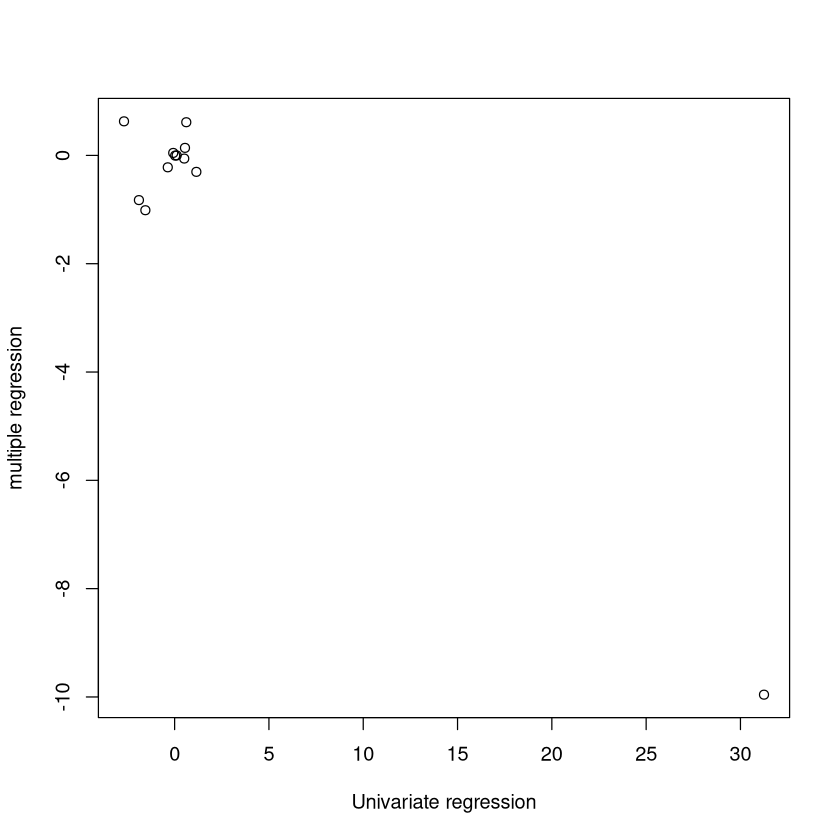

In [55]:
plot(sapply(fits, function(x) coef(x)[2]), coef(fit)[-1], 
  xlab = "Univariate regression", 
  ylab = "multiple regression")

(d) Is there evidence of non-linear association between any of hte predictors and the response? To answer this question, for each predictor $X$, fit a model of the form
\begin{align}
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
\end{align}

In [56]:
pred <- subset(pred, select = -chas)
fits <- lapply(names(pred), function(p) {
  f <- paste0("crim ~ poly(", p, ", 3)")
  lm(as.formula(f), data = Boston)
})
for (fit in fits) printCoefmat(coef(summary(fit)))

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)    3.61352    0.37219  9.7088 < 2.2e-16 ***
poly(zn, 3)1 -38.74984    8.37221 -4.6284 4.698e-06 ***
poly(zn, 3)2  23.93983    8.37221  2.8594  0.004421 ** 
poly(zn, 3)3 -10.07187    8.37221 -1.2030  0.229539    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
                Estimate Std. Error t value  Pr(>|t|)    
(Intercept)       3.6135     0.3300 10.9501 < 2.2e-16 ***
poly(indus, 3)1  78.5908     7.4231 10.5873 < 2.2e-16 ***
poly(indus, 3)2 -24.3948     7.4231 -3.2863  0.001086 ** 
poly(indus, 3)3 -54.1298     7.4231 -7.2920 1.196e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)     3.61352    0.32157 11.2370 < 2.2e-16 ***
poly(nox, 3)1  81.37202    7.23361 11.2492 < 2.2e-16 ***
poly(nox, 3)2 -28.82859    7.23361 -3.9854 7.737e-05 ***
poly(nox, 3)3 -60.36189    7.23361 -8.3446 6.961e-16 ***
---
Signif.

Yes there is strong evidence for many variables having non-linear associations. In many cases, the addition of a cubic term is significant (`indus`, `nox`, `age`, `dis`, `ptratio` and `medv`). In other cases although the cubic terms is not significant, the squared term is (`zn`, `rm`, `rad`, `tax`, `lstat`).